Big Data Analytics HW2
======================
##### Submission by: Shane Lindquist

For this project, we will again be using the dataset ml1mdata2000.csv which describes movie ratings and user activities from MovieLens, a movie reccomendation service. The data contains over 1mil observations with the below attributes:

* User ID
* Gender
* Age
* Occupation
* Zip Code
* Movie ID
* Title
* Genre
* Rating
* Timestamp

##### Using this data, we will answer/complete the following tasks:

1) How many missing values are there in the dataset?
2) Which attribute has the most missing values?
3) What is the number of rows in the original data? What is the number of rows after dropping
the missing values?
4) After you drop the missing values, display the summary statistics for the ‘age’ column,
including mean, standard deviation, minimum, maximum values. For the following questions
use this version of the dataset.
5) Display the correlation between all pairs of attributes. Which pair has the highest
correlation? Why?
6) Plot the age histogram using six bins. How does the distribution of age look like? Does the
shape you identify continues to hold when you change the number of bins?
7) Check whether duplicate rows exist in the dataset or not. What is the number of duplicate
rows? Display rows 20 and 76. Which attributes are the same?
8) Generate a new dataframe that includes only ‘rating’ and ‘age’ columns of your last data
(data from question 4). Standardize the two columns and display the first 7 rows.
9) Discard the outliers using the following rule Z > 2 or Z <= -2. Compute the number of
discarded rows.
10) Generate another dataframe using the data from question 4. This new dataframe only
includes ‘rating’ and ‘date’ columns. Use ‘date’ column as an index. Group and aggregate
ratings by year and obtain the annual average ratings. Display the annual average ratings.
How does the annual average rating change over the years?
11) Generate a new dataframe by randomly selecting 1000 rows from your dataset in question 4.
Using this dataset generate three bins with equal width for the age column. How many
observations are there in each bin?

### Prepping the data

In [70]:
import pandas as pd
mlmdata = pd.read_csv("C:/Users/lindq/OneDrive/Desktop/MSBA degree/Big Data Analysis/ml1mdata2000.csv")
mlmdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   user_id     1000196 non-null  float64
 1   movie_id    1000129 non-null  float64
 2   rating      1000209 non-null  int64  
 3   timestamp   1000209 non-null  int64  
 4   gender      1000209 non-null  object 
 5   age         1000143 non-null  float64
 6   occupation  1000154 non-null  float64
 7   zip         1000136 non-null  object 
 8   title       1000036 non-null  object 
 9   genres      1000116 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 76.3+ MB


##### in order to use the timestamp data, we will need to change it to a datetime object which we will do in a new 'date' column. We will also split off 'year' and 'month' columns for further use.

In [71]:
# get the date from timestamp:
mlmdata['date']=pd.to_datetime(mlmdata['timestamp'], unit='s', errors='coerce')
#using the DatetimeIndex() function to extract year and month:
mlmdata['year'] = pd.DatetimeIndex(mlmdata['date']).year
mlmdata['month'] = pd.DatetimeIndex(mlmdata['date']).month
mlmdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   user_id     1000196 non-null  float64       
 1   movie_id    1000129 non-null  float64       
 2   rating      1000209 non-null  int64         
 3   timestamp   1000209 non-null  int64         
 4   gender      1000209 non-null  object        
 5   age         1000143 non-null  float64       
 6   occupation  1000154 non-null  float64       
 7   zip         1000136 non-null  object        
 8   title       1000036 non-null  object        
 9   genres      1000116 non-null  object        
 10  date        1000209 non-null  datetime64[ns]
 11  year        1000209 non-null  int32         
 12  month       1000209 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(2), int64(2), object(4)
memory usage: 91.6+ MB


##### in the next step we will work on the missing values, we can see some exist within the 'Non-Null' output.

### 1: How many missing values are there in the dataset?

In [72]:
#summing the count of na values across the dataset
print(f"There are {mlmdata.isna().sum().sum()} missing/NA values in the mlmdata")

There are 553 missing/NA values in the mlmdata


### 2: Which attribute has the most missing values?

In [131]:
#summing the count of na values by category then sorting by the highest value to the lowest
mostna = mlmdata.isna().sum().sort_values(ascending = False)

print(f"The attribute '{mostna.index[0]}' has the most missing values, it has {mostna.iloc[0]} NA values")

The attribute 'title' has the most missing values, it has 173 NA values


### 3: What is the number of rows in the original data? What is the number of rows after droppingthe missing values?

In [132]:
print(f"There are {len(mlmdata)} rows in the dataset")

There are 1000209 rows in the dataset


In [75]:
#dropping the na values and storing it in a new variable
mlmtrimmed = mlmdata.dropna()

print(f"There are {len(mlmtrimmed)} observations in the dataset after dropping the missing values")

There are 999795 observations in the dataset after dropping the missing values


### 4: After you drop the missing values, display the summary statistics for the ‘age’ column, including mean, standard deviation, minimum, maximum values. For the following questions use this version of the dataset.

In [76]:
mlmtrimmed['age'].describe()

count    999795.000000
mean         29.738092
std          11.751970
min           1.000000
25%          25.000000
50%          25.000000
75%          35.000000
max          56.000000
Name: age, dtype: float64

### 5: Display the correlation between all pairs of attributes. Which pair has the highest correlation? Why?

In [77]:
import seaborn as sns
#selecting numeric attributes
mlmcorrplot = mlmtrimmed.select_dtypes(include=['number']).corr()
mlmcorrplot

,user_id,movie_id,rating,timestamp,age,occupation,year,month
user_id,1.000000,-0.017614,0.012384,-0.490446,0.034718,-0.026696,-0.094316,-0.633603
movie_id,-0.017614,1.000000,-0.064094,0.041597,0.027591,0.008543,0.039231,-0.003239
rating,0.012384,-0.064094,1.000000,-0.026750,0.056876,0.006733,-0.024483,0.000943
timestamp,-0.490446,0.041597,-0.026750,1.000000,-0.064597,0.015637,0.840574,0.121068
age,0.034718,0.027591,0.056876,-0.064597,1.000000,0.078362,-0.065603,0.016184
occupation,-0.026696,0.008543,0.006733,0.015637,0.078362,1.000000,-0.003114,0.035156
year,-0.094316,0.039231,-0.024483,0.840574,-0.065603,-0.003114,1.000000,-0.432900
month,-0.633603,-0.003239,0.000943,0.121068,0.016184,0.035156,-0.432900,1.000000


<Axes: >

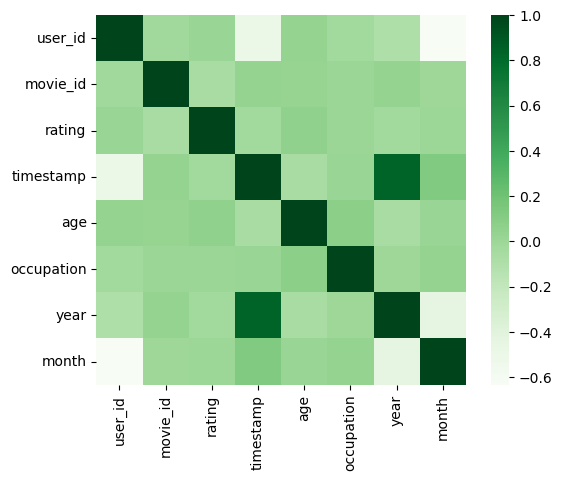

In [78]:
#creating a heatmap for better visability
sns.heatmap(mlmcorrplot, square = True, cmap="Greens")

##### When interpreting the question literally and including all attributes, the most correlated pair is Year and Timestamp with a correlation of 0.840592. This occurs because both columns represent time-related information as timestamps increase over the dataset, the corresponding year values also increase. Since Timestamp is stored as an integer, the .corr() function treats both columns as numeric and detects this shared upward trend. However, we should filter out the attributes which may be numeric but have no influence on the other numbers.

In [79]:
#filtering the corr plot to only the relavent attributes
numeric_cols = ['rating', 'age', 'occupation']
trimmedcorr = mlmtrimmed[numeric_cols].corr()
trimmedcorr

,rating,age,occupation
rating,1.000000,0.056876,0.006733
age,0.056876,1.000000,0.078362
occupation,0.006733,0.078362,1.000000


<Axes: >

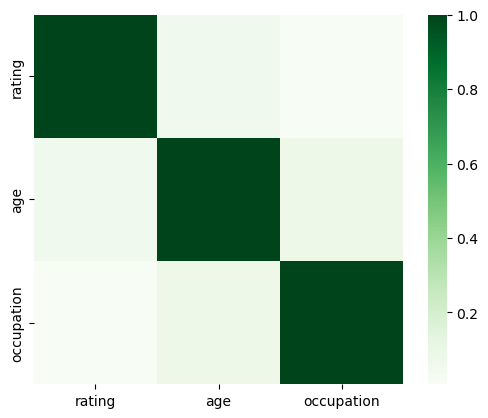

In [80]:
#creating a heatmap for better visability
sns.heatmap(trimmedcorr, square = True, cmap="Greens")

##### Within the narrowed dataset, Age and Occupation form the most highly correlated pair. While one could speculate about a causal relationship, correlation alone does not provide evidence of causation. Especially so at such a low correlation of .078369

### 6: Plot the age histogram using six bins. How does the distribution of age look like? Does the shape you identify continues to hold when you change the number of bins?

<Axes: ylabel='Frequency'>

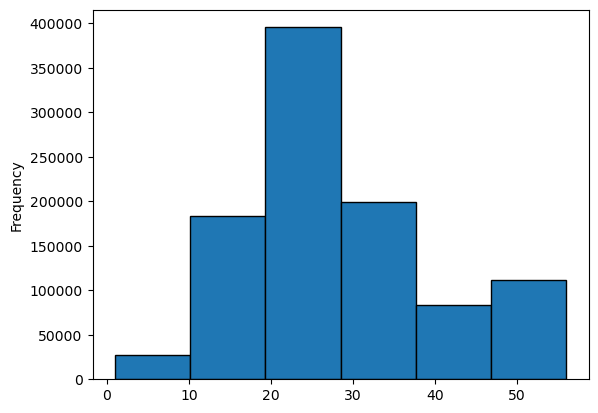

In [81]:
mlmtrimmed['age'].plot(kind='hist', bins=6, edgecolor='black')

###### With 6 bins the data looks fairly normally distributed with a slight skew to the right

<Axes: ylabel='Frequency'>

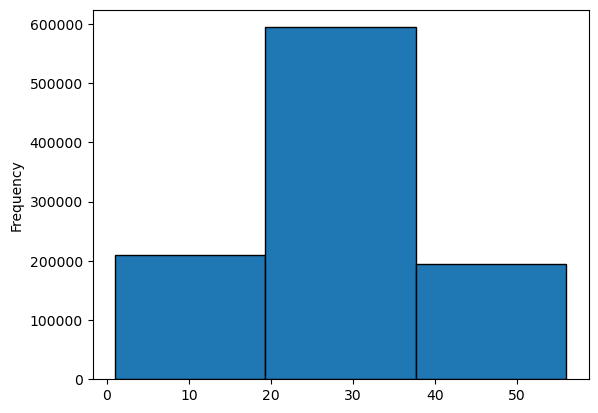

In [82]:
mlmtrimmed['age'].plot(kind='hist', bins=3, edgecolor='black')

##### with only 3 bins, the data looks normally distributed

<Axes: ylabel='Frequency'>

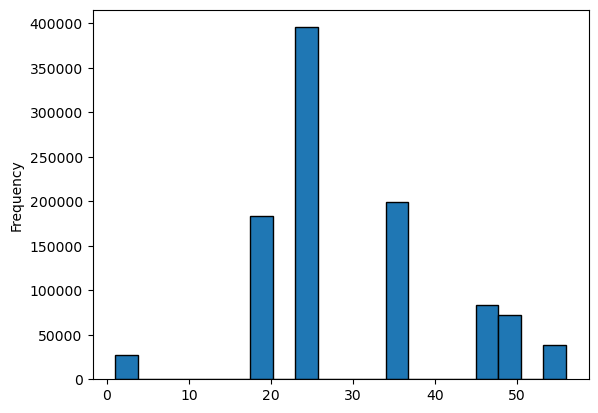

In [83]:
mlmtrimmed['age'].plot(kind='hist', bins=20, edgecolor='black')

###### with 20 bins, the data still resembles a normal distribution. You can more clearly see the extra data on the right causing the slight skew from 6 bins. These plots show the distribution looks slightly more or less Normally distributed when changing the number of bins

### 7: Check whether duplicate rows exist in the dataset or not. What is the number of duplicate rows? Display rows 20 and 76. Which attributes are the same?

In [136]:
mlmtrimmed.duplicated().unique()

array([False])

##### as the .duplicated() function returns only false here, there are no fully duplicated rows

In [84]:
print(f"There are {mlmtrimmed.duplicated().sum()} fully duplicated rows in the dataset")

There are 0 fully duplicated rows in the dataset


In [85]:
mlmtrimmed[20:76]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,date,year,month
32,120.0,1193.0,5,977458103,M,25.0,11.0,27106,One Flew Over the Cuckoo's Nest (1975),Drama,2000-12-22 04:08:23,2000,12
33,123.0,1193.0,5,977448350,M,35.0,9.0,67208,One Flew Over the Cuckoo's Nest (1975),Drama,2000-12-22 01:25:50,2000,12
34,131.0,1193.0,5,977431822,M,18.0,4.0,6520,One Flew Over the Cuckoo's Nest (1975),Drama,2000-12-21 20:50:22,2000,12
35,136.0,1193.0,4,977421091,M,18.0,2.0,21202,One Flew Over the Cuckoo's Nest (1975),Drama,2000-12-21 17:51:31,2000,12
36,139.0,1193.0,4,977359402,F,25.0,20.0,45409,One Flew Over the Cuckoo's Nest (1975),Drama,2000-12-21 00:43:22,2000,12
37,146.0,1193.0,4,979940868,F,35.0,20.0,10954,One Flew Over the Cuckoo's Nest (1975),Drama,2001-01-19 21:47:48,2001,1
38,150.0,1193.0,5,978163667,M,35.0,7.0,98144,One Flew Over the Cuckoo's Nest (1975),Drama,2000-12-30 08:07:47,2000,12
39,151.0,1193.0,4,993121122,F,25.0,20.0,85013,One Flew Over the Cuckoo's Nest (1975),Drama,2001-06-21 10:58:42,2001,6
40,155.0,1193.0,5,977253254,M,35.0,12.0,7470,One Flew Over the Cuckoo's Nest (1975),Drama,2000-12-19 19:14:14,2000,12
41,166.0,1193.0,5,977299851,M,18.0,4.0,92802,One Flew Over the Cuckoo's Nest (1975),Drama,2000-12-20 08:10:51,2000,12


##### However, when we examine each row we can plainly see multiple rows contain duplicates. Though the entire observation may not be a duplicate entirely. 

In [86]:
#shorten the dataset to rows 20:76
truncdata = mlmtrimmed[20:76]

# Show duplicates per column
for col in truncdata.columns:
    duplicates = truncdata[col].duplicated()
    if not duplicates.empty:
        print(f"Duplicates in column '{col}': {duplicates.sum()}")

Duplicates in column 'user_id': 0
Duplicates in column 'movie_id': 55
Duplicates in column 'rating': 52
Duplicates in column 'timestamp': 0
Duplicates in column 'gender': 54
Duplicates in column 'age': 50
Duplicates in column 'occupation': 41
Duplicates in column 'zip': 1
Duplicates in column 'title': 55
Duplicates in column 'genres': 55
Duplicates in column 'date': 0
Duplicates in column 'year': 53
Duplicates in column 'month': 50


##### Out of the 55 observations analyzed: 'title', 'movie_id', and 'genres' are all duplicated (when considering the individual column). 'Rating', 'gender', 'age', 'occupation', 'zip', 'year', and 'month' also all contain some duplicated values. 'user_id', 'timestamp', and 'date' all contain fully unique values.

### 8: Generate a new dataframe that includes only ‘rating’ and ‘age’ columns of your last data (data from question 4). Standardize the two columns and display the first 7 rows.


In [87]:
from sklearn.preprocessing import StandardScaler

#new dataframe
newdf = mlmtrimmed[["rating","age"]]

#Standardizing the data
scaler = StandardScaler()
newdf[['rating','age']] = scaler.fit_transform(newdf[['rating','age']])

#displaying the first 7 rows
newdf.head(7)

C:\Users\lindq\AppData\Local\Temp\ipykernel_9640\3141319840.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf[['rating','age']] = scaler.fit_transform(newdf[['rating','age']])


,rating,age
0,1.269683,-2.445386
1,1.269683,2.234682
2,0.374487,-0.403175
3,0.374487,-0.403175
4,1.269683,1.724129
5,0.374487,-0.998820
6,1.269683,-2.445386


### 9: Discard the outliers using the following rule Z > 2 or Z <= -2. Compute the number of discarded rows.


In [108]:
#storring row count before dropping outliers
pretrimmed = len(newdf)

#filtering the data
newdftrimmed = newdf[(newdf <= -2).all(axis=1) | (newdf > 2).all(axis=1)]

print(f"In the first data set, there were {pretrimmed} rows. Now there are {len(newdftrimmed)} rows. We removed {pretrimmed-len(newdftrimmed)} rows.")


In the first data set, there were 999795 rows. Now there are 2238 rows. We removed 997557 rows.


### 10: Generate another dataframe using the data from question 4. This new dataframe only includes ‘rating’ and ‘date’ columns. Use ‘date’ column as an index. Group and aggregate ratings by year and obtain the annual average ratings. Display the annual average ratings. How does the annual average rating change over the years?


In [120]:
#creating a new dataframe and setting the date as the index and adding a year column
newdf2 = mlmtrimmed[["rating","date"]].set_index("date")
mlmtrimmed['year'] = mlmtrimmed['date'].dt.year

#grouping and printing a list of the average rating
print(mlmtrimmed.groupby('year')['rating'].mean().reset_index())


   year    rating
0  2000  3.590495
1  2001  3.512231
2  2002  3.459160
3  2003  3.488337


C:\Users\lindq\AppData\Local\Temp\ipykernel_9640\713167565.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mlmtrimmed['year'] = mlmtrimmed['date'].dt.year


##### The average rating trends down over the years at a steady pace

### 11: Generate a new dataframe by randomly selecting 1000 rows from your dataset in question 4. Using this dataset generate three bins with equal width for the age column. How many observations are there in each bin?

In [124]:
random_df = mlmtrimmed.sample(n=1000, random_state=42)
len(random_df)

1000

In [125]:
random_df['bins'] = pd.cut(random_df['age'], bins=3, labels=['bin1', 'bin2', 'bin3'])

In [130]:
print(random_df['bins'].value_counts().reset_index())

   bins  count
0  bin2    582
1  bin1    216
2  bin3    202
